# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

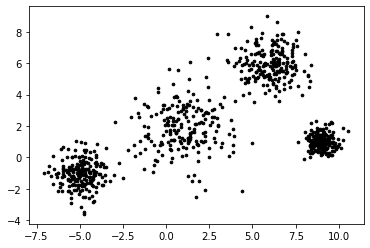

In [3]:

center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed =5
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

## First I create some functions and specify the colour scheme 

In [4]:
colours = ['g','b','y','c']
def createFirstCentres(k,c,data,seed=6):
    np.random.seed = seed
    centres = np.random.randn(k,c)*np.std(data)+np.mean(data)
    return centres
def plotFirstCentres(centres):
    colours = ['g','b','y','c']
    centres = pd.DataFrame(centres, columns=['x','y'])
    centres['clusters'] = range(4)
    kwargs = {'edgecolor':"r", # for edge color
              'linewidth':1, # line width of spot
              'linestyle':'-', # line style of spot
             }
    sns.scatterplot(x='x',y='y',hue='clusters',data=centres,palette=colours, **kwargs)
    return centres

def getClosestCentroid(point, centres): ##Finds the Euclidean distance between points and centroids
    dist = []
    for c in centres:
        dist.append(np.linalg.norm(point-c))
    return dist.index(min(dist))

#iterates through every item in data and creates a list that appends the cluster these points belong to
def getCluster(data,centres): 
    cluster = []
    for point in data:
        cluster.append(getClosestCentroid(point,centres))
    return cluster

def relocateCentroids(df,c):
    c1 = df[df['clusters']==c]
    c1_x = c1.iloc[:,0].mean()
    c1_y = c1.iloc[:,1].mean()
    centroid = [c1_x,c1_y]
    return centroid

def placeCentroids(df):
    colours = ['g','b','y','c']
    centroids = []
    for i in range(4):
        centroids.append(relocateCentroids(df,i))

    df = pd.DataFrame(centroids, columns=['x','y','clusters'])
    kwargs  =   {'edgecolor':"r", # for edge color
                 'linewidth':1, # line width of spot
                 'linestyle':'-', # line style of spot
                }
    sns.scatterplot(x='x',y='y',hue='clusters',data=df,palette=colours, **kwargs)

def getPoints(data,c):
    x,y = data[:,0], data[:,1]
    df = pd.DataFrame({'x':x,'y':y,'clusters':c})
    return df
    
def plotPoints(df):
    x,y = data[:,0],data[:,1]
    sns.scatterplot(x='x',y='y',hue='clusters',data=df,palette=colours,legend=False)
    
def generateNewCentres(df):
    new_centres = []
    for c in range(4):
        new_centres.append(relocateCentroids(df,c))
    return new_centres
 

In [5]:
centres = createFirstCentres(4,2,data)  ##Randomise the first centres

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

**Notice:** 
I've noticed a weird interaction with `np.random.seed = seed` and jupyter notebooks where even if I set the seed, every execution of the notebook's cell would re-randomnise the data points and centres.


This is strange and it occurs even in the first cell of the portfolio that was done for us already.
Because of this, this portfolio may require more or less iterations for the clusters to fully place in the centre of their respective clusters. 

For the **first iteration**, I randomised the centroids initially by using the formula above `centres = np.random.randn(k,c)*std + mean`, and set the seed to `seed = 6`. 

This creates four random centroids. I then created a list of the clusters that each data point belongs to using the `getCluster()` function. This functions additionally calls the `getClosestCentroid()` function which calculates the absolute euclidean distance from the data points to each centroid and returns the index of the minimum distance (which is essentially the index of the centroid or you could call it the cluster number).

I use this newly created list and input it as a parameter for my `getPoints()` function which creates a 3 column wide (`['x','y','clusters']`) dataframe with the data points and the clusters they belong to.

I then use my `plotPoints()` function which takes a dataframe and plots the points using seaborn's scatterplot function.
Finally, I use my `plotFirstCentres()` function to plot the randomly generated centres on to the plot and print the four centre's coordinates so observe the differences numerically over the future iterations.

Centre 0: [2.26879698 3.11507314]
Centre 1: [5.40788527 0.38786227]
Centre 2: [-0.83136669  0.45427951]
Centre 3: [3.29079115 2.62408576]


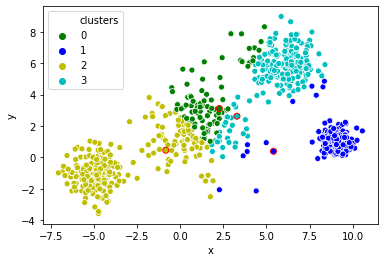

In [8]:
# data = np.concatenate((data,centres)) 
c = getCluster(data,centres)
df = getPoints(data,c) ##creates a dataframe with the data points and clusters based on centroids
plotPoints(df) ## Plots these data points
plotFirstCentres(centres) ##Plots these centres on a scatterplot

for i,centre in enumerate(centres):
    print("Centre {}: {}".format(i,centre))

The **second** iteration requires me to firstly generate new centroids. I do this using the `generateNewCentres()` function which calls the `relocateCentroids()` function to create a list of `new_centres`. I then use these `new_centres` and just like the first iteration, I input these centres into the `getCluster` map that data points to their respective clusters based on the euclidean distance that is calculated by the `getClosestCentroid()` function. 
I then call the `getPoints()` function which is used purely to recalculate the clusters (some data points may be part of different clusters due to the centroids moving).

Finally, I plot the data points and new centres.

Centre 0: [1.650188004576293, 3.4915229125352245]
Centre 1: [8.827279830829967, 1.0629372021466807]
Centre 2: [-3.4998261618220825, -0.4025840325348187]
Centre 3: [5.682198077900111, 5.374290494171313]


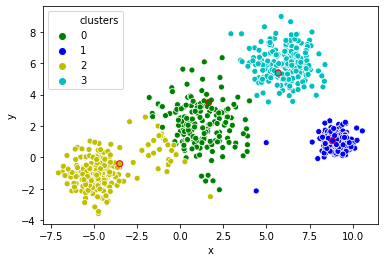

In [10]:
new_centres = generateNewCentres(df)
c1 = getCluster(data,new_centres)
df1 = getPoints(data,c1)
plotPoints(df1)
plotFirstCentres(new_centres)
for i,centre in enumerate(new_centres):
    print("Centre {}: {}".format(i,centre))

Centre 0: [1.2541308743349517, 2.11733317234042]
Centre 1: [8.961309279534253, 1.0082187023292204]
Centre 2: [-4.49943594689973, -0.8637958032424304]
Centre 3: [6.031995719983356, 5.962969173334771]


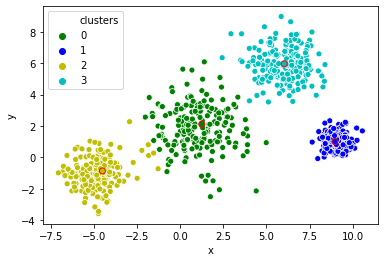

In [11]:
new_centres = generateNewCentres(df1)
c2 = getCluster(data,new_centres)
df2 = getPoints(data,c2)
plotPoints(df2)
plotFirstCentres(new_centres)
for i,centre in enumerate(new_centres):
    print("Centre {}: {}".format(i,centre))

Centre 0: [1.0719752782488556, 1.9014319235570778]
Centre 1: [9.003963826619412, 1.0243052728595599]
Centre 2: [-4.847812059404047, -0.9937756055613833]
Centre 3: [6.004471163762074, 5.95330648197392]


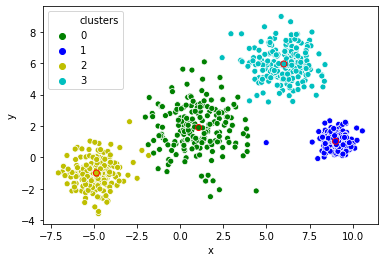

In [12]:
new_centres = generateNewCentres(df2)
c3 = getCluster(data,new_centres)
df3 = getPoints(data,c3)
plotPoints(df3)
plotFirstCentres(new_centres)
for i,centre in enumerate(new_centres):
    print("Centre {}: {}".format(i,centre))

Centre 0: [1.0105967188514233, 1.8786038495137678]
Centre 1: [8.983971798654299, 1.0238774465564768]
Centre 2: [-4.896522746773677, -1.010226406711249]
Centre 3: [6.004471163762074, 5.95330648197392]


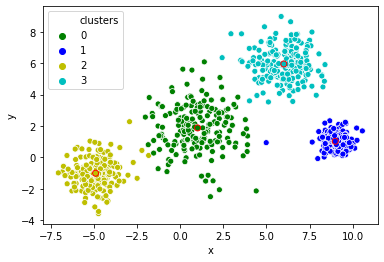

In [13]:
new_centres = generateNewCentres(df3)
c4 = getCluster(data,new_centres)
df4 = getPoints(data,c4)
plotPoints(df4)
plotFirstCentres(new_centres)
for i,centre in enumerate(new_centres):
    print("Centre {}: {}".format(i,centre))

**Final Iteration**
As stated above, since the data points are randomised everytime I restart the notebook, it is impossible for me to tell which iteration the centroids will stop moving at. Therefore I have stopped at the 6th iteration as in most cases, this is the final iteration required for the centroids become stationary.

Centre 0: [1.0105967188514233, 1.8786038495137678]
Centre 1: [8.983971798654299, 1.0238774465564768]
Centre 2: [-4.896522746773677, -1.010226406711249]
Centre 3: [6.004471163762074, 5.95330648197392]


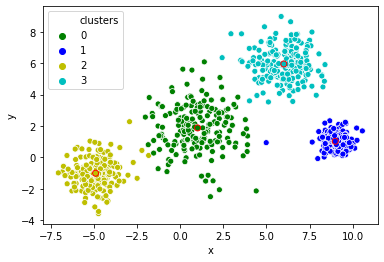

In [14]:
new_centres = generateNewCentres(df4)
c5 = getCluster(data,new_centres)
df5 = getPoints(data,c5)
plotPoints(df5)
plotFirstCentres(new_centres)
for i,centre in enumerate(new_centres):
    print("Centre {}: {}".format(i,centre))